# Mustafa Thesis code

In [136]:
#https://www.statsilk.com/maps/download-free-shapefile-maps
#labelling cities
#https://stackoverflow.com/questions/38899190/geopandas-label-polygons
#for font modification
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller#for dickey fuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import pandas as pd
from functools import reduce # Python3 this helps to make extract 1D
from itertools import groupby

from matplotlib.pylab import rcParams
from shapely.geometry import Point
rcParams['figure.figsize'] = 30,30
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## calling radon

In [137]:
r=pd.read_excel(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\Mustafa Radon Data final thesis Erzincan.xlsx")

In [138]:
r=pd.DataFrame({"Radon":r["Radon"].values},index=r["Date"])

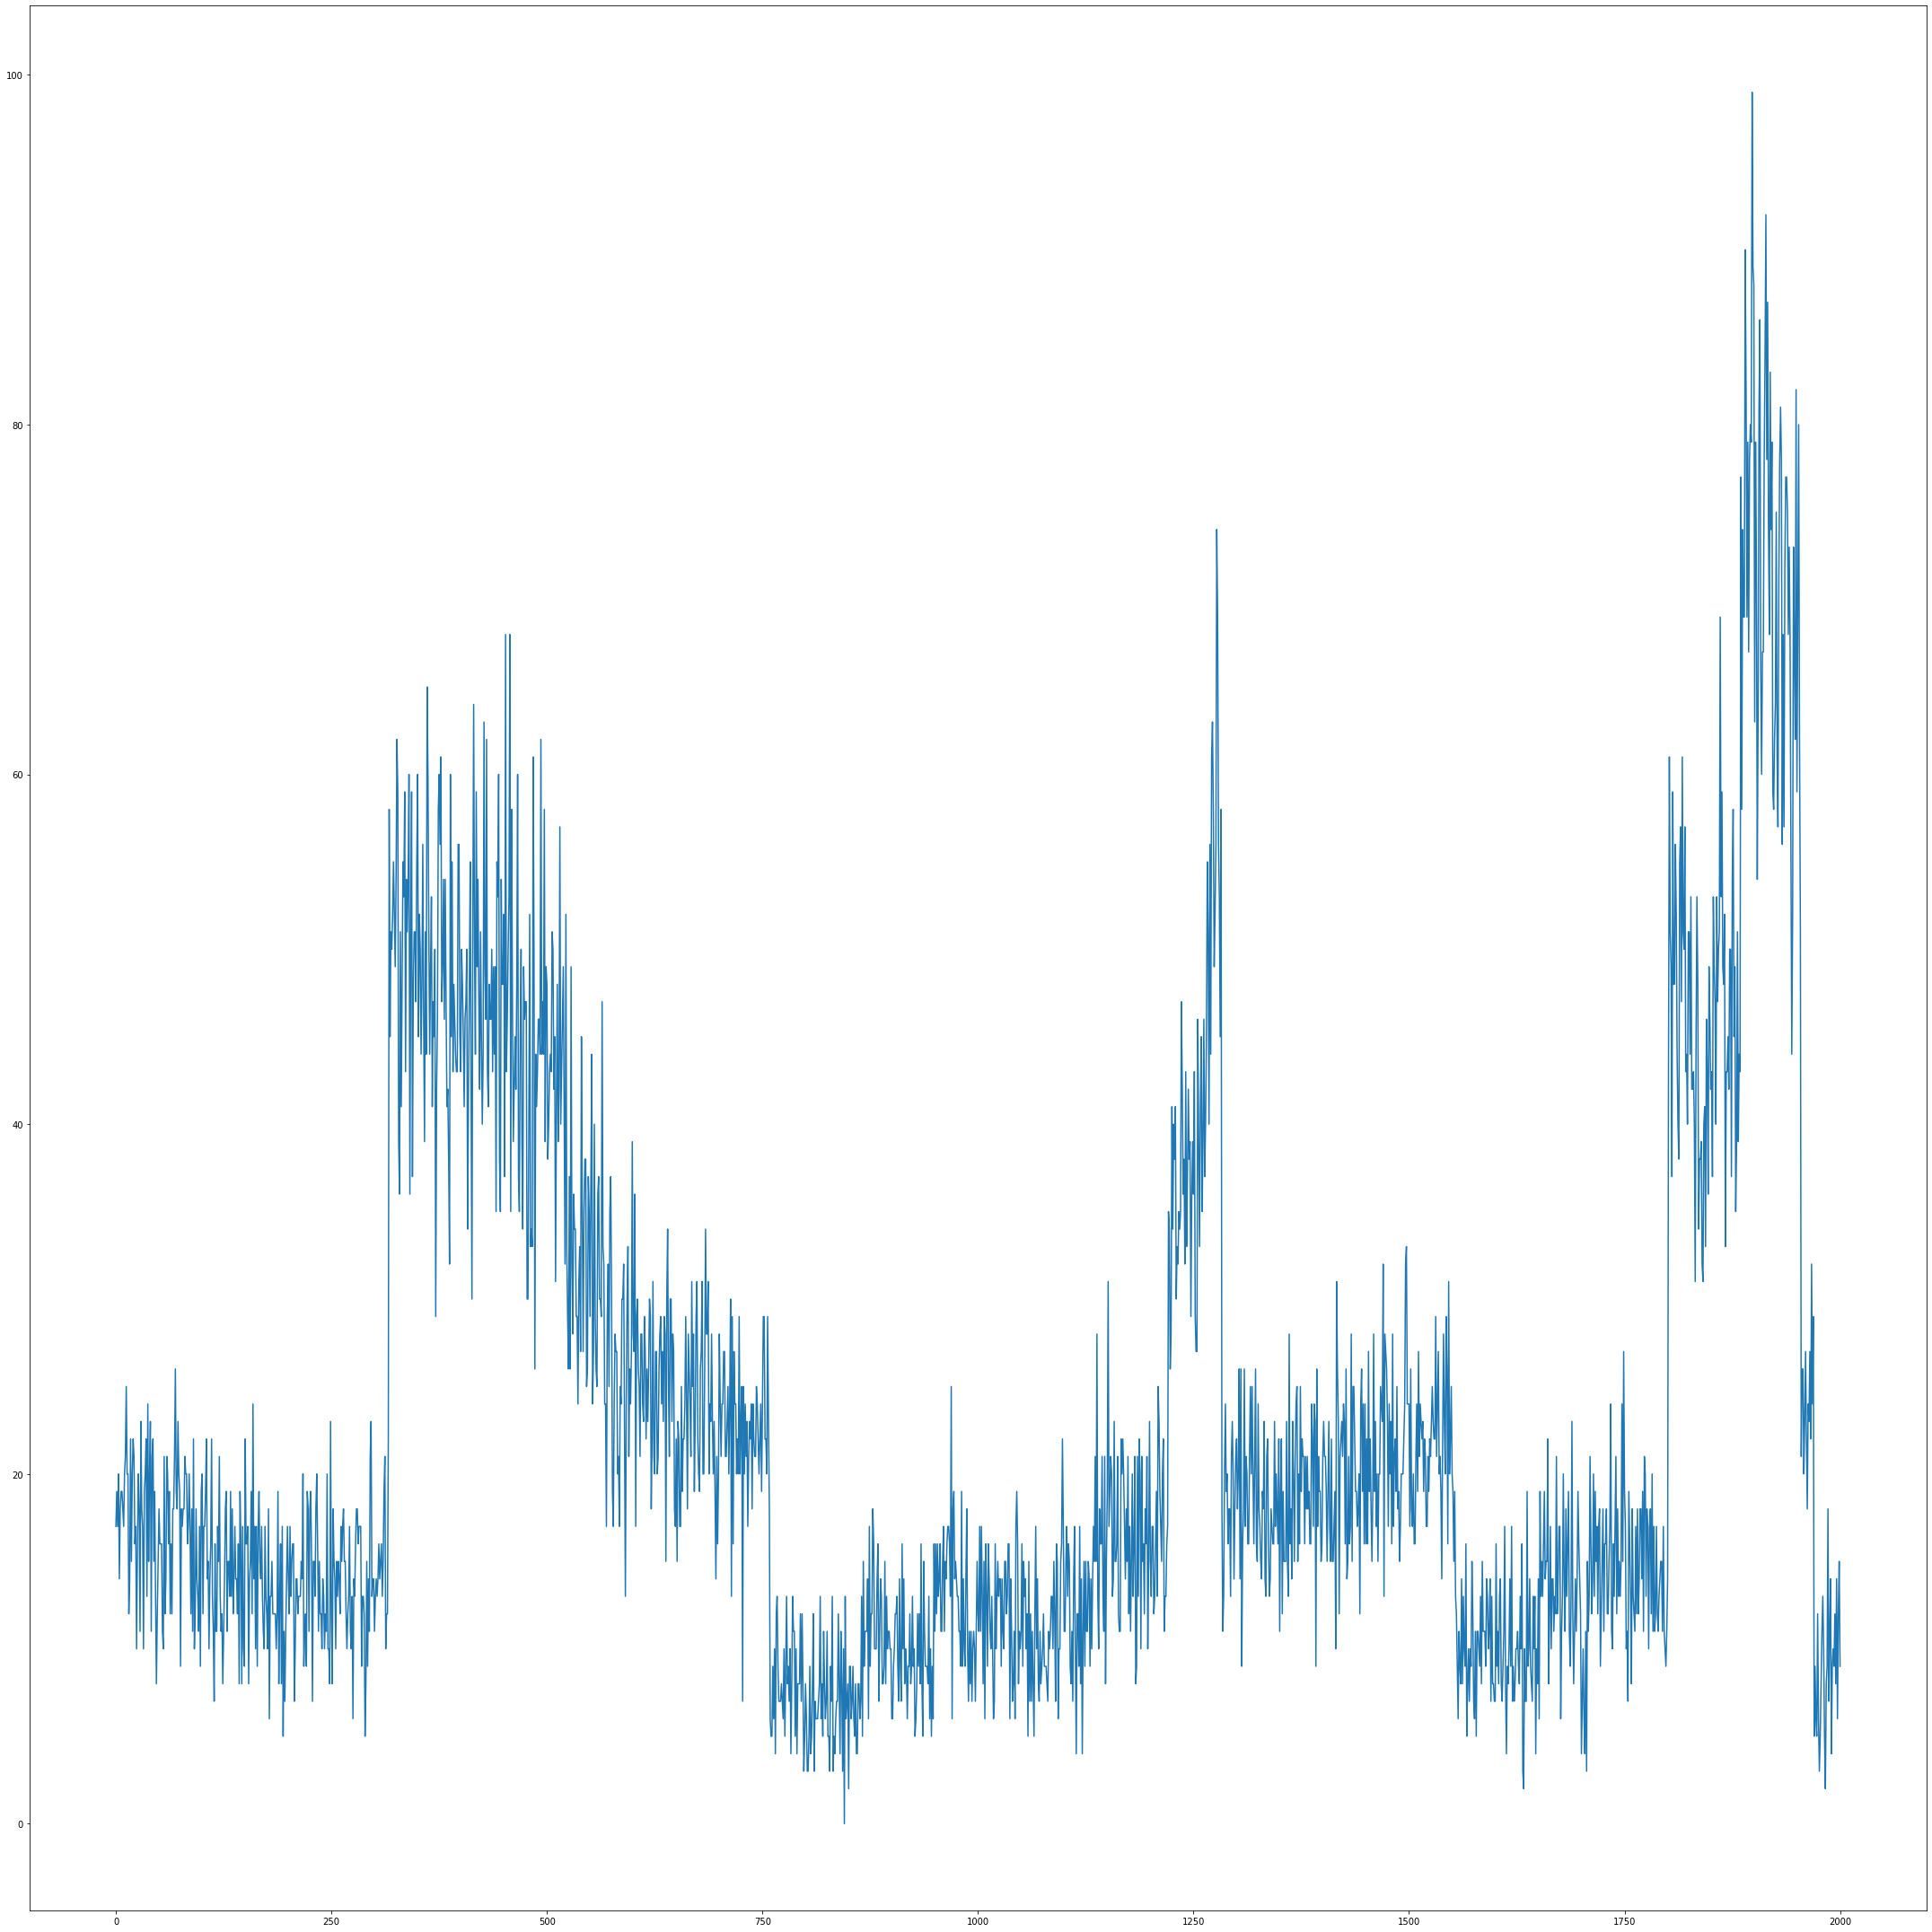

In [139]:
plt.plot(r.Radon.values)#[1000:1500])
plt.tight_layout()

# Calling earthquake data

In [140]:
df=pd.read_excel(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa Earthquakes excel.xlsx")
df["datetime"] =pd.to_datetime( df["Date"].astype(str)+ " " + df["Origin Time"].astype(str))#concatenating date and time columns and converting them to date time format(from object to date time)
df.index=df.datetime

## Importing pressure and converting to datetime

In [141]:
pr=pd.read_excel(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa pressure excel.xlsx")
pr["datetime"] =pd.to_datetime( pr["year"].astype(str)+"-"+pr["month"].astype(str) +"-" + pr["day"].astype(str))#concatenating date and time columns and converting them to date time format(from object to date time)
pr.index=pr.datetime

## importing 5cm soil temperature and converting to date time

In [142]:
t5=pd.read_excel(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa 5cm soil temp excel.xlsx")
t5["datetime"] =pd.to_datetime( t5["year"].astype(str)+"-"+t5["month"].astype(str) +"-" + t5["day"].astype(str))#concatenating date and time columns and converting them to date time format(from object to date time)
t5.index=t5.datetime

## importing Atmospheric temperature and converting to date time

In [143]:
ta=pd.read_excel(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa atmospheric temp excel.xlsx")
ta["datetime"] =pd.to_datetime( ta["year"].astype(str)+"-"+ta["month"].astype(str) +"-" + ta["day"].astype(str))#concatenating date and time columns and converting them to date time format(from object to date time)
ta.index=ta.datetime

In [144]:
ta=ta["2007-03-11 15:15:00":"2010-02-09 18:15:00"]

t5=t5["2007-03-11 15:15:00":"2010-02-09 18:15:00"]

pr=pr["2007-03-11 15:15:00":"2010-02-09 18:15:00"]

# Plotting Radon and Earthquake

In [145]:
r["count"]=np.arange(len(r))#..............nan na tsaya

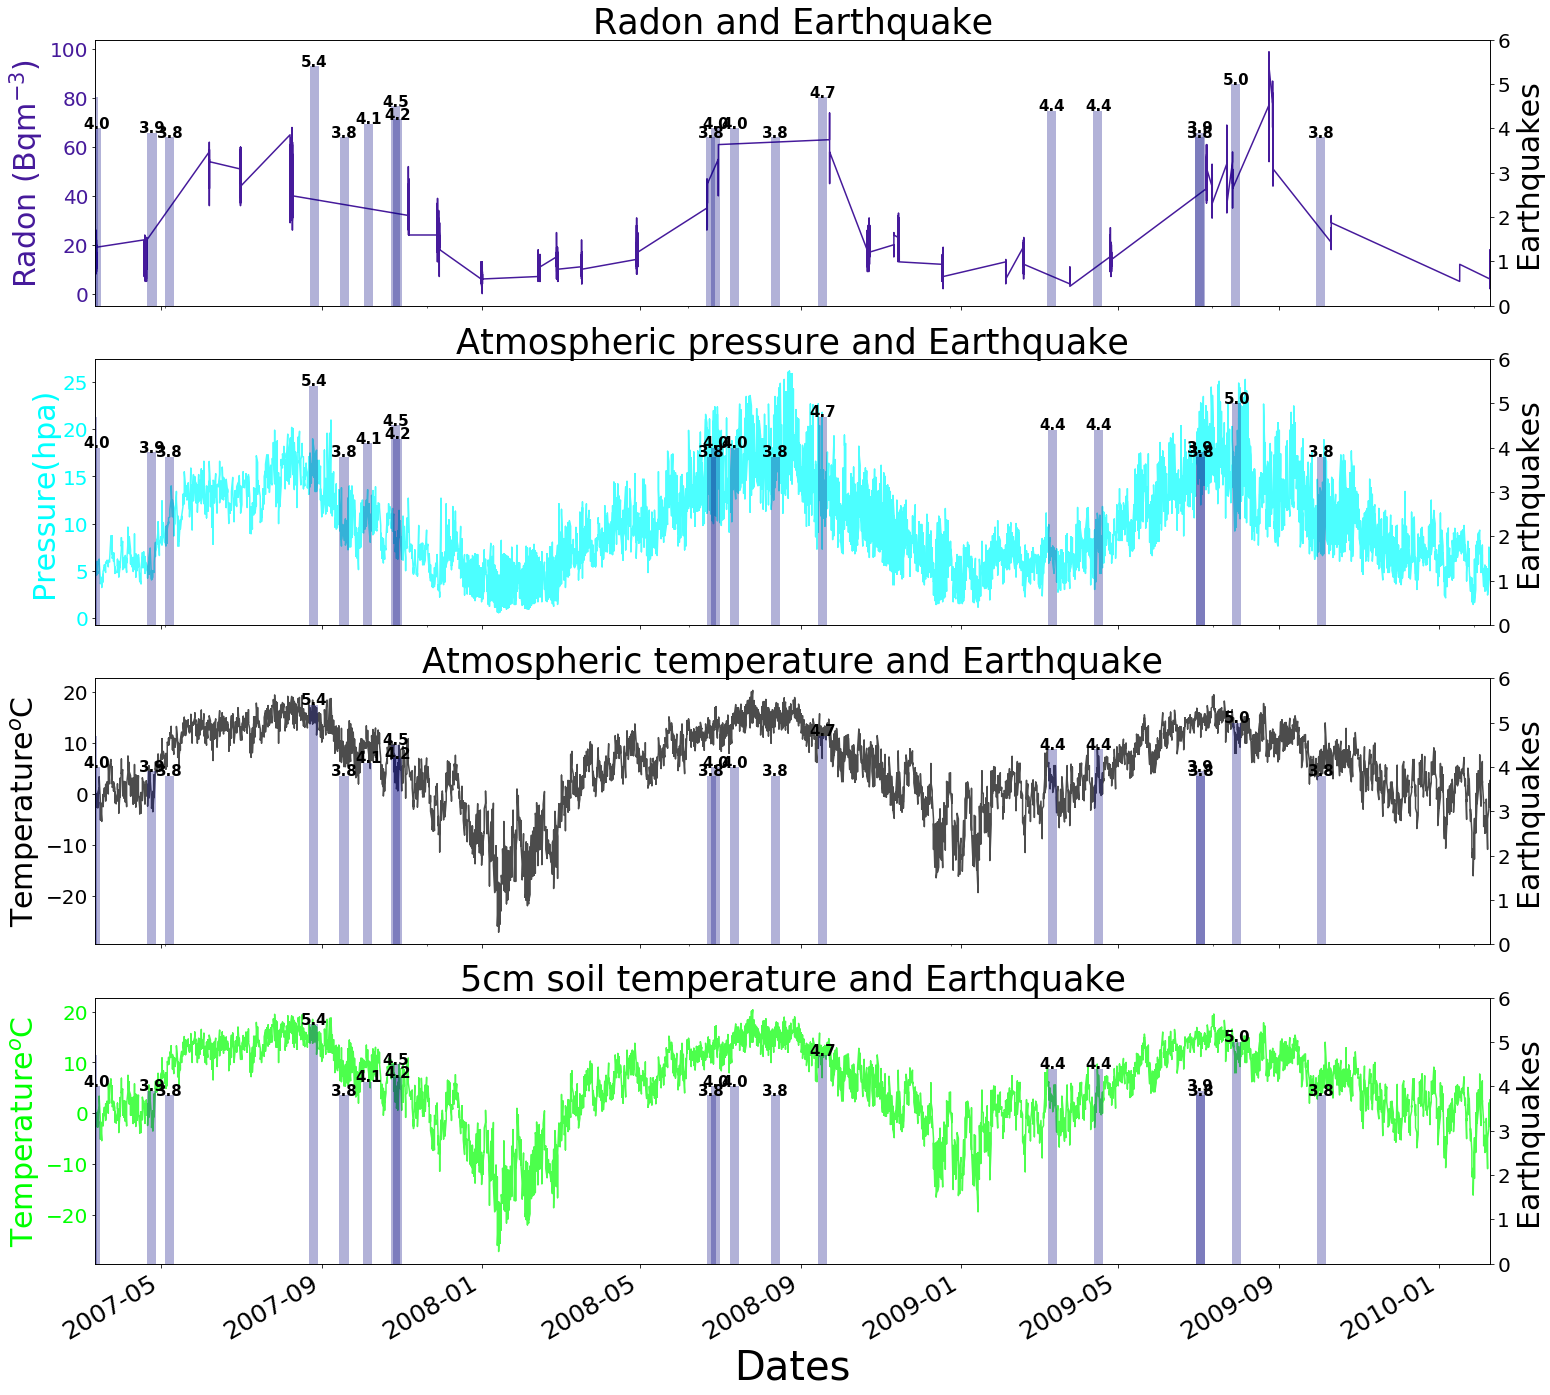

In [146]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25,25))#declaring the figure(kyuya ce ta hanani chanza sunan to figure1)
spec= gridspec.GridSpec(ncols=1, nrows=4, figure=fig)#specifying three columns and two rows 
ax1= fig.add_subplot(spec[0, :])#first long plot

ax2= fig.add_subplot(spec[1, :])#second row first plot
ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis xa1
ax4 = ax1.twinx()  # instantiate a second axes that shares the same x-axis xa1
ax5= fig.add_subplot(spec[2, :])#second row first plot
ax6 = ax5.twinx()  # instantiate a second axes that shares the same x-axis xa1
ax7= fig.add_subplot(spec[3, :])#second row first plot
ax8 = ax7.twinx()  # instantiate a second axes that shares the same x-axis xa1
#scale=300 *EE.xM#scale size of the earthquake bubble in plot 
df=df[df.xM>3.7]
size=len(df.index)
xs = df.index#the x values
ys = df.xM#the y axis
#................................................plotting radon
color = '#461a9b'#setting axis color

ax1.plot(r.Radon,color=color,label="Radon")
ax1.set_ylabel("Radon (Bqm$^{-3}$)", color=color,fontsize=30)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color,labelsize=20)#tick lables

ax1.set_title('Radon and Earthquake',fontsize=35)#title
ax1.set(xlim=(r.index[0], r.index[-1]))#setting the x axis limits
ax1.tick_params(axis='x',labelsize=0)#tick lables
#....................................................
#...........................................plotting earthquakes...............
size=len(df.index)
xs = df.index#the x values
ys = df.xM#the y axis
ax4.bar(xs,ys,width=7,color="#000080",alpha=0.3)#plotting earthquake
ax4.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax4.tick_params(axis='y',labelsize=20)#tick lables

#ax4.set_xlabel("Dates", fontsize=30)
for x, y, label in zip(df.index, df.xM, df.xM):
    ax4.annotate(label, xy=(x, y), xytext=(-13,0), textcoords="offset points",fontsize=15,weight='bold')
    ax4.set(ylim=(0, int(max(df.xM))+1))#I setting adjust to  y axis
    #ax2.set(xlim=(radon.index[0], radon.index[-1]))#setting the x axis limits

#..................................plotting pressure........................
pr.pressure.plot(ax=ax2,color="#00FFFF",label="pressure",alpha=0.7)
ax2.set_ylabel("Pressure(hpa)", color="#00FFFF",fontsize=30)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor="#00FFFF",labelsize=20)#tick lables
ax2.set_title('Atmospheric pressure and Earthquake',fontsize=35)#title
#...........................................plotting earthquakes...............
size=len(df.index)
xs = df.index#the x values
ys = df.xM#the y axis
ax3.bar(xs,ys,width=7,color="#000080",alpha=0.3)#plotting earthquake
ax3.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax3.tick_params(axis='y',labelsize=20)#tick lables
#ax2.tick_params(axis='x',labelsize=25)#tick lables

for x, y, label in zip(df.index, df.xM, df.xM):
    ax3.annotate(label, xy=(x, y), xytext=(-13,0), textcoords="offset points",fontsize=15,weight='bold')
    ax3.set(ylim=(0, int(max(df.xM))+1))#I setting adjust to  y axis
    #ax2.set(xlim=(radon.index[0], radon.index[-1]))#setting the x axis limits

    
#..........................................Atmospheric temperature temperature..............................
colort="k"
#..................................plotting pressure........................
ta.temp.plot(ax=ax5,color=colort,label="pressure",alpha=0.7)
ax5.set_ylabel("Temperature$^o$C", color=colort,fontsize=30)  # we already handled the x-label with ax1
ax5.tick_params(axis='y', labelcolor=colort,labelsize=20)#tick lables
ax5.set_title('Atmospheric temperature and Earthquake',fontsize=35)#title
#...........................................plotting earthquakes...............
size=len(df.index)
xs = df.index#the x values
ys = df.xM#the y axis
ax6.bar(xs,ys,width=7,color="#000080",alpha=0.3)#plotting earthquake
ax6.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax6.tick_params(axis='y',labelsize=20)#tick lables
ax6.tick_params(axis='x',labelsize=25)#tick lables

for x, y, label in zip(df.index, df.xM, df.xM):
    ax6.annotate(label, xy=(x, y), xytext=(-13,0), textcoords="offset points",fontsize=15,weight='bold')
    ax6.set(ylim=(0, int(max(df.xM))+1))#I setting adjust to  y axis

    
#..........................................5cm soil temperature..............................
colort="#00FF00"
#..................................plotting pressure........................
ta.temp.plot(ax=ax7,color=colort,label="pressure",alpha=0.7)
ax7.set_ylabel("Temperature$^o$C", color=colort,fontsize=30)  # we already handled the x-label with ax1
ax7.tick_params(axis='y', labelcolor=colort,labelsize=20)#tick lables
ax7.set_title('5cm soil temperature and Earthquake',fontsize=35)#title
ax7.tick_params(axis='x',labelsize=25)#tick lables
ax7.set_xlabel("Dates", fontsize=40)
#...........................................plotting earthquakes...............
size=len(df.index)
xs = df.index#the x values
ys = df.xM#the y axis
ax8.bar(xs,ys,width=7,color="#000080",alpha=0.3)#plotting earthquake
ax8.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax8.tick_params(axis='y',labelsize=20)#tick lables
ax8.tick_params(axis='x',labelsize=25)#tick lables
ax8.set_xlabel("Dates", fontsize=30)
for x, y, label in zip(df.index, df.xM, df.xM):
    ax8.annotate(label, xy=(x, y), xytext=(-13,0), textcoords="offset points",fontsize=15,weight='bold')
    ax8.set(ylim=(0, int(max(df.xM))+1))#I setting adjust to  y axis
    
#....................saving plot
#plt.savefig(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa plot.png")


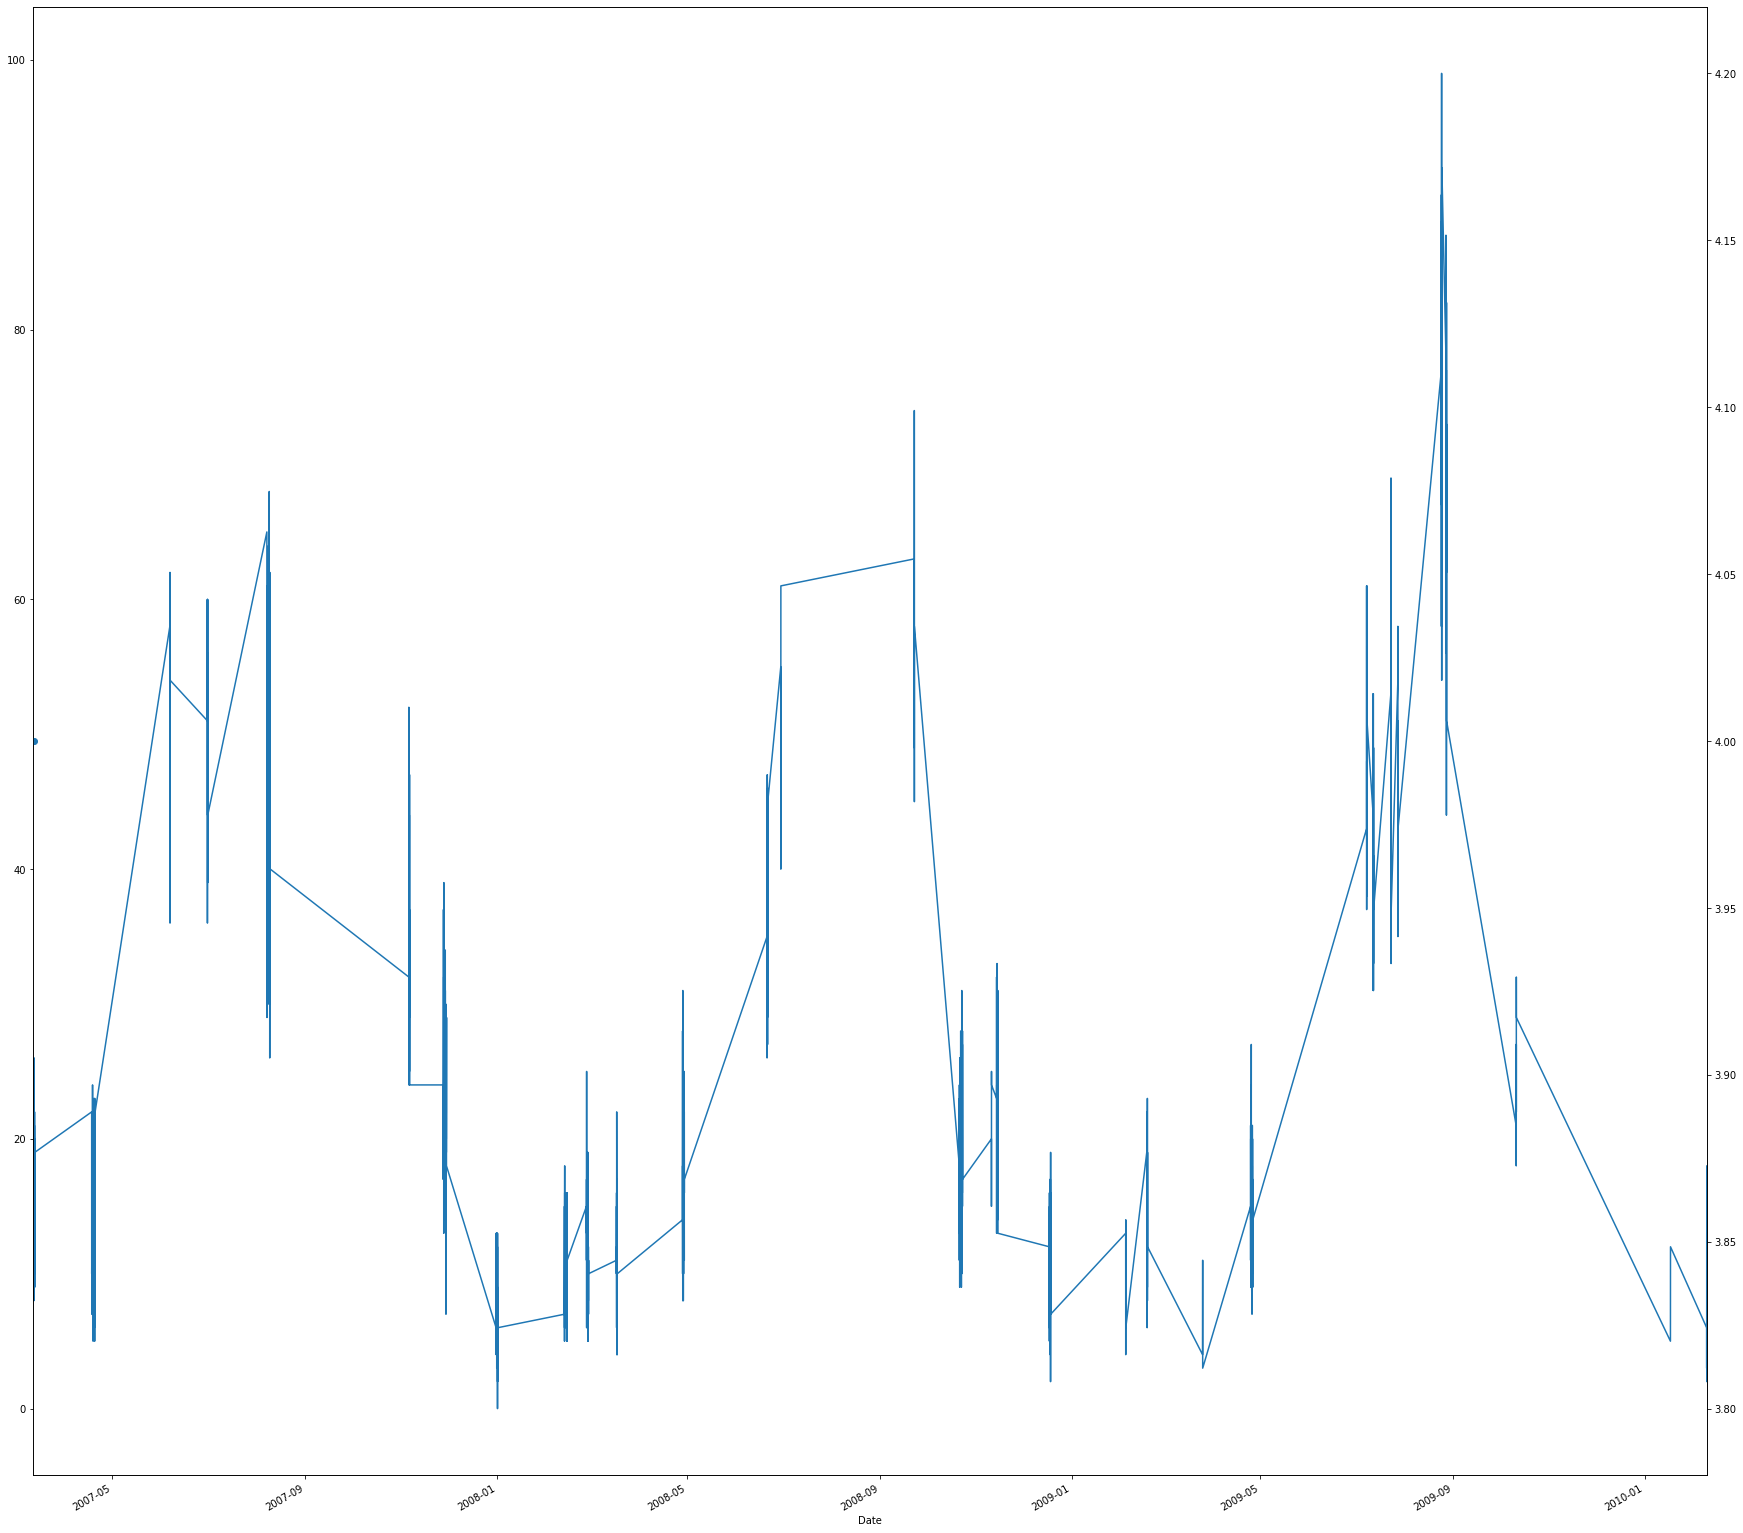

In [147]:
ax=r.Radon.plot()#[0:30].plot()
ax2=ax.twinx()
ax2.plot(df.loc["2007-03-12 12:33:17.170"].datetime,df.loc["2007-03-12 12:33:17.170"].xM,"o")

# Tec time series extraction function

In [148]:
from matplotlib.pylab import rcParams
from shapely.geometry import Point
rcParams['figure.figsize'] = 25, 6
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## tecfetch(f):#this function will get input f as raw text data from iri2016 and return one column data frame  of tec

In [149]:
def tecfetch(f):#this function will get input f as raw text data from iri2016 and return one column data frame  of tec
    #print("if you get error check the text file if there is space in the end")
    import re#for extraction of data in string line
    from functools import reduce # Python3 this helps to make extract 1D
    from itertools import groupby#will help to extract data from array
    f=f.split("\n")
    f=f[26:]#because the data starts from here
    tec=[]#this will capture all rows in the text file
    index=np.arange(len(f))#this is index that will be used in the data frame

    for i in f:
        p=re.findall(r'[\d\.\d]+', i)[1]#extracting only kp values living out the index
        tec.append(p)#appending the extracted values

    tec=pd.DataFrame({"tec":tec},index=index)#transforming kp into a dataFrame
    #but it will have object data...we need to convert to numeric
    
    tec.tec=pd.to_numeric(tec.tec,errors='coerce')
    return tec

### calling the function

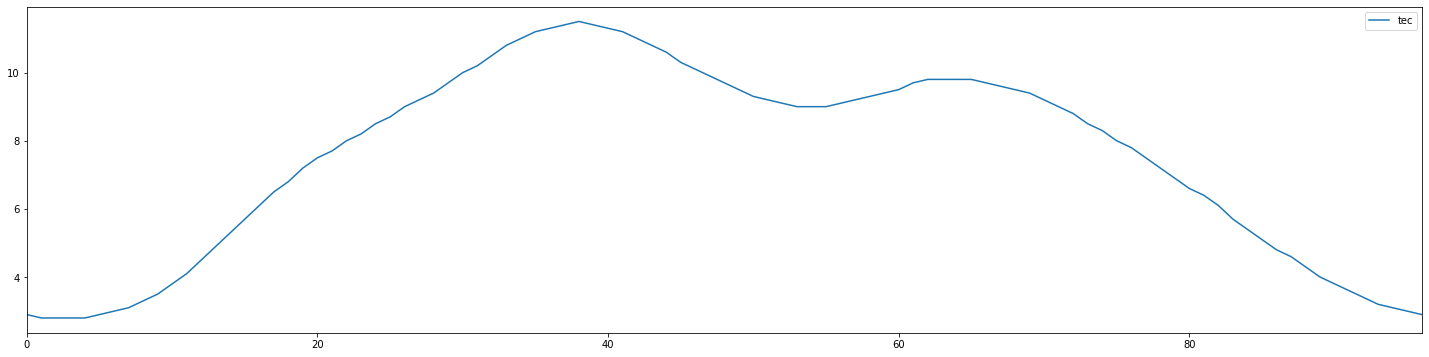

In [150]:
T=open(r"C:\Users\MM\OneDrive\hocam Monte paper\All TEC maps data\TEC map kp dst data\vtec iri erzincan\aug 1 2007.TXT").read()
p=tecfetch(T)
#p=pd.to_numeric(tecfetch(T).kp,errors='coerce')
p.plot()

## call many files and assemble result

In [151]:
tec1=pd.DataFrame()#this will be the final data frame output
for i in range(1,13,1):# running through the index saved by names
    T=open(r"C:\Users\MM\OneDrive\hocam Monte paper\All TEC maps data\TEC map kp dst data\vtec iri erzincan\oct %d 2007.TXT"%i).read()
    p=tecfetch(T)#applying tec fetch function to catch all data
    tec1["oct %d 2007"%i]=p.tec#appending to columns of the data frame

#tec1;#let me see my tec data frame before creating the 1-d 
tec1=tec1.drop([96])#dropping the last row because the values replicate in the first row of following day
#this is because I downloaded the data each day starting from 0-24

## transform the data frame into one d

In [152]:
tec1d=[]
for colum in tec1:#looping through the columns of tec1
    tec1d.append(tec1[colum].values)#getting the values from the columns and appending to 
tec1d=np.array(tec1d)#turning it into an array
tec1d=tec1d.flatten()
#plt.plot(tec1d)#flattening inorder to get 1d


### creating tec data frame with dates data range 

In [153]:
dates=pd.date_range(start="2007-10-01 00:00:00", end='2007-10-12 23:45:00',freq='15T')#creating a date range by the hour based on the input
#len(tec1d), len(dates),60/4#this tells you if the dimensions are thesame
tec1d=pd.DataFrame({"tec":tec1d},index=dates)


# Plotting the TEC and 4.1 earthquake

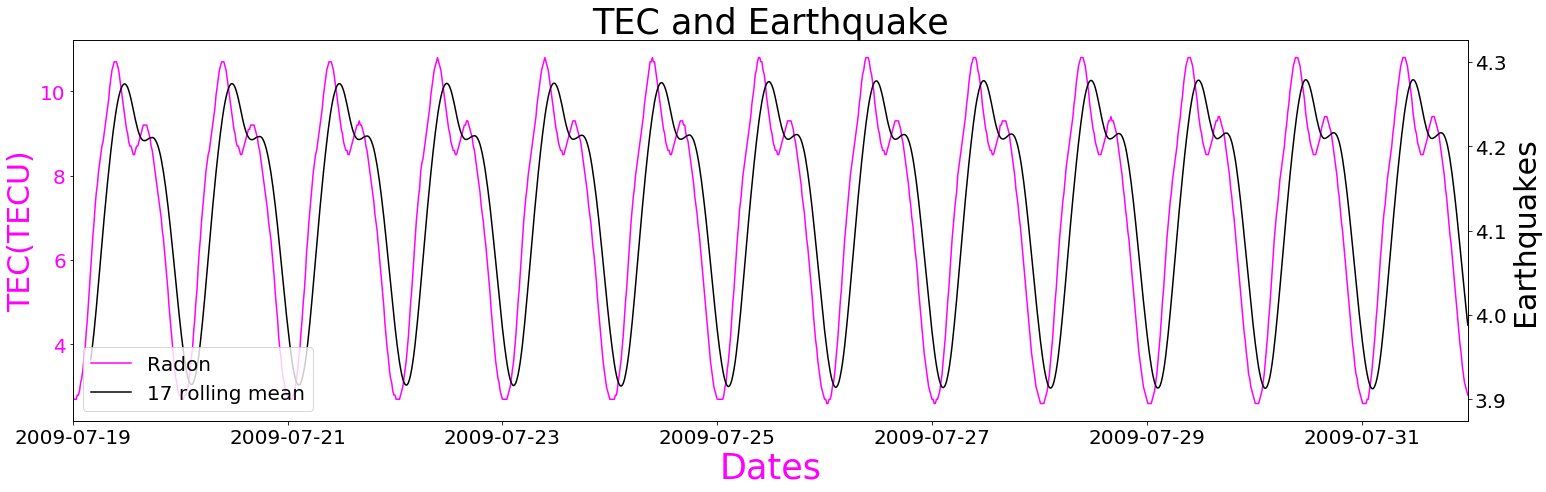

In [162]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25,7))#declaring the figure(kyuya ce ta hanani chanza sunan to figure1)
#spec= gridspec.GridSpec(ncols=1, nrows=4, figure=fig)#specifying three columns and two rows 
ax1= fig.add_subplot()#first long plot
ax2=ax1.twinx()
#df=df.xM.sort_index()[10:11]#df[df.xM>3.7]
#................................TEC moving average..............................................................
tec_rolmean =tec1d.rolling(window=17).mean() # 24 hours on each day#this is where you can change the rolling mean window
#................................................plotting radon
color = 'FUCHSIA'#setting axis color
ax1.plot(tec1d,color=color,label="Radon")
ax1.plot(tec_rolmean,color="k",label="17 rolling mean")
ax1.set_ylabel("TEC(TECU)", color=color,fontsize=30)  # we already handled the x-label with ax1
ax1.set_xlabel("Dates", color=color,fontsize=35)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color,labelsize=20)#tick lables
ax1.tick_params(axis='x',labelsize=20)#tick lables
ax1.set_title('TEC and Earthquake',fontsize=35)#title
ax1.set(xlim=(tec1d.index[0],tec1d.index[-1]))#setting the x axis limits
ax1.legend(fontsize=20,loc="lower left")
#....................................................
ax2.plot(df.xM.sort_index()[10:11],marker="o",markersize=39,color='blue',alpha=0.3)
ax2.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax2.tick_params(axis='y',labelsize=20)#tick lables
plt.savefig(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa tec 4.1 plot.png")

#### Tec again

In [155]:
tec1=pd.DataFrame()#this will be the final data frame output
for i in range(1,31,1):# running through the index saved by names
    T=open(r"C:\Users\MM\OneDrive\hocam Monte paper\All TEC maps data\TEC map kp dst data\vtec iri erzincan\sep %d 2008.TXT"%i).read()
    p=tecfetch(T)#applying tec fetch function to catch all data
    tec1["sep %d 2007"%i]=p.tec#appending to columns of the data frame

#tec1;#let me see my tec data frame before creating the 1-d 
tec1=tec1.drop([96])#dropping the last row because the values replicate in the first row of following day
#this is because I downloaded the data each day starting from 0-24
tec1d=[]
for colum in tec1:#looping through the columns of tec1
    tec1d.append(tec1[colum].values)#getting the values from the columns and appending to 
tec1d=np.array(tec1d)#turning it into an array
tec1d=tec1d.flatten()
#plt.plot(tec1d)#flattening inorder to get 1d
dates=pd.date_range(start="2008-09-01 00:00:00", end='2008-09-30 23:45:00',freq='15T')#creating a date range by the hour based on the input
#len(tec1d), len(dates),60/4#this tells you if the dimensions are thesame
tec1d=pd.DataFrame({"tec":tec1d},index=dates)


In [156]:
tec1d;
df.xM.sort_index()[17:18];

# Plotting the TEC and 4.1 earthquake

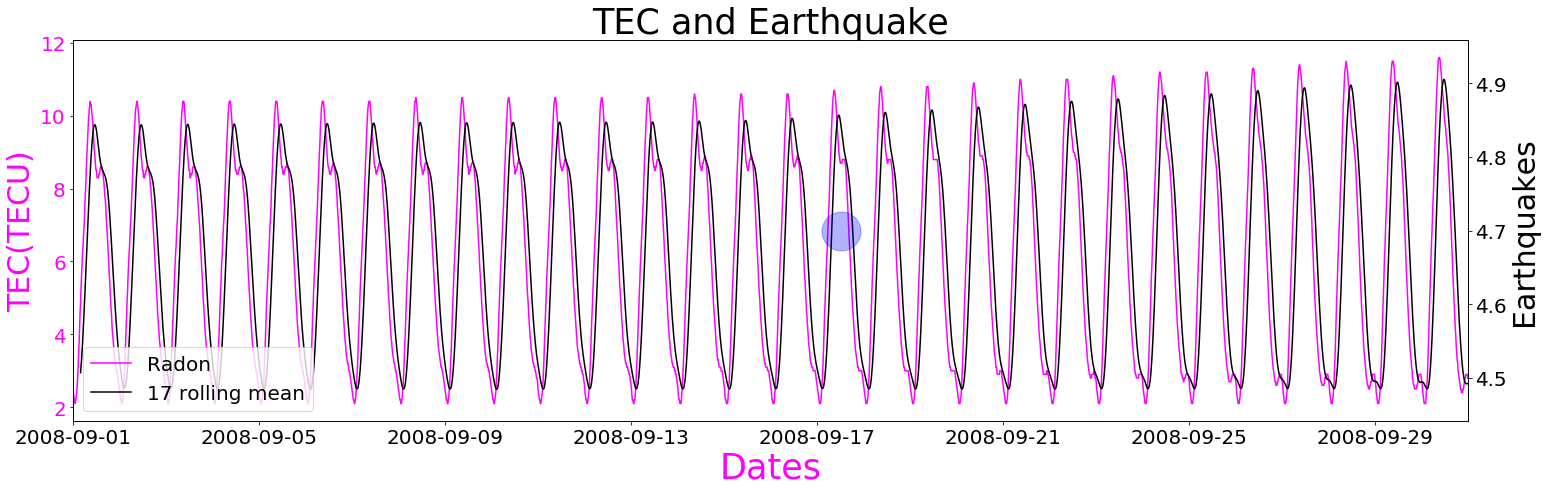

In [157]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25,7))#declaring the figure(kyuya ce ta hanani chanza sunan to figure1)
#spec= gridspec.GridSpec(ncols=1, nrows=4, figure=fig)#specifying three columns and two rows 
ax1= fig.add_subplot()#first long plot
ax2=ax1.twinx()
#df=df.xM.sort_index()[10:11]#df[df.xM>3.7]
#................................TEC moving average..............................................................
tec_rolmean =tec1d.rolling(window=17).mean() # 24 hours on each day#this is where you can change the rolling mean window
#................................................plotting radon
color = 'FUCHSIA'#setting axis color
ax1.plot(tec1d,color=color,label="Radon")
ax1.plot(tec_rolmean,color="k",label="17 rolling mean")
ax1.set_ylabel("TEC(TECU)", color=color,fontsize=30)  # we already handled the x-label with ax1
ax1.set_xlabel("Dates", color=color,fontsize=35)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color,labelsize=20)#tick lables
ax1.tick_params(axis='x',labelsize=20)#tick lables
ax1.set_title('TEC and Earthquake',fontsize=35)#title
ax1.set(xlim=(tec1d.index[0],tec1d.index[-1]))#setting the x axis limits
ax1.legend(fontsize=20,loc="lower left")
#....................................................
ax2.plot(df.xM.sort_index()[17:18],marker="o",markersize=39,color='blue',alpha=0.3)
ax2.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax2.tick_params(axis='y',labelsize=20)#tick lables
plt.savefig(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa tec 4.7 plot.png")

#### Tec again

In [158]:
tec1=pd.DataFrame()#this will be the final data frame output
for i in range(19,32,1):# running through the index saved by names
    T=open(r"C:\Users\MM\OneDrive\hocam Monte paper\All TEC maps data\TEC map kp dst data\vtec iri erzincan\jul %d 2009.TXT"%i).read()
    p=tecfetch(T)#applying tec fetch function to catch all data
    tec1["jul %d 2009"%i]=p.tec#appending to columns of the data frame

#tec1;#let me see my tec data frame before creating the 1-d 
tec1=tec1.drop([96])#dropping the last row because the values replicate in the first row of following day
#this is because I downloaded the data each day starting from 0-24
tec1d=[]
for colum in tec1:#looping through the columns of tec1
    tec1d.append(tec1[colum].values)#getting the values from the columns and appending to 
tec1d=np.array(tec1d)#turning it into an array
tec1d=tec1d.flatten()
#plt.plot(tec1d)#flattening inorder to get 1d
dates=pd.date_range(start="2009-07-19 00:00:00", end='2009-07-31 23:45:00',freq='15T')#creating a date range by the hour based on the input
#len(tec1d), len(dates),60/4#this tells you if the dimensions are thesame
tec1d=pd.DataFrame({"tec":tec1d},index=dates)


In [159]:
tec1d;
df.xM.sort_index()[22:23];

# Plotting the TEC and 5.0 earthquake

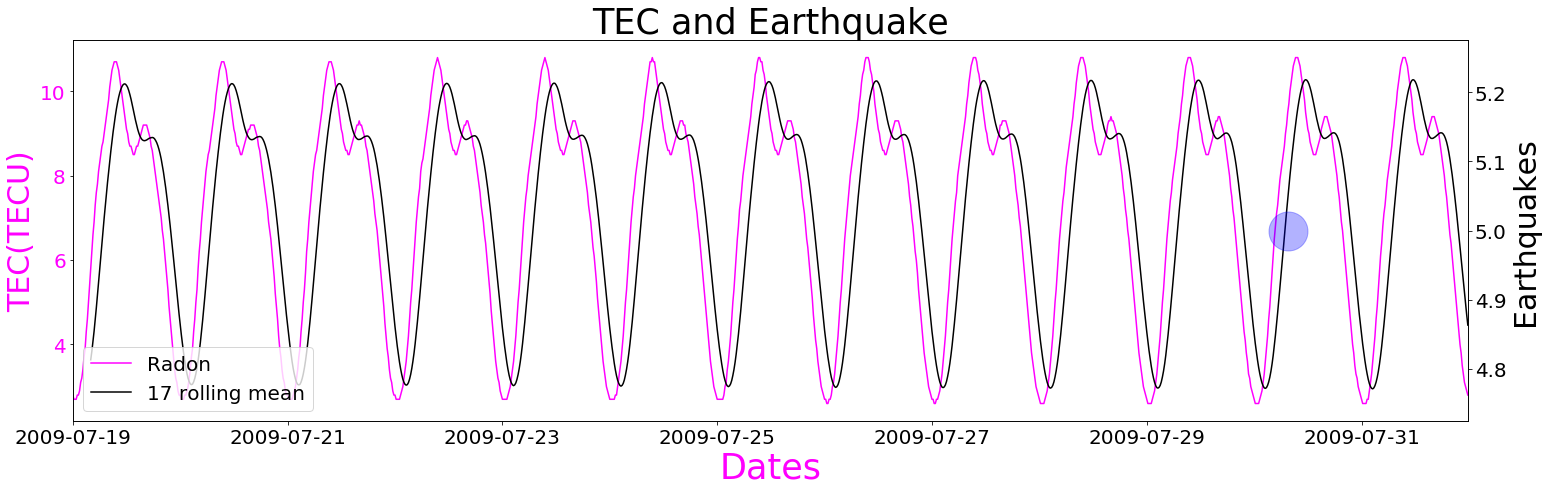

In [160]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(25,7))#declaring the figure(kyuya ce ta hanani chanza sunan to figure1)
#spec= gridspec.GridSpec(ncols=1, nrows=4, figure=fig)#specifying three columns and two rows 
ax1= fig.add_subplot()#first long plot
ax2=ax1.twinx()
#df=df.xM.sort_index()[10:11]#df[df.xM>3.7]
#................................TEC moving average..............................................................
tec_rolmean =tec1d.rolling(window=17).mean() # 24 hours on each day#this is where you can change the rolling mean window
#................................................plotting radon
color = 'FUCHSIA'#setting axis color
ax1.plot(tec1d,color=color,label="Radon")
ax1.plot(tec_rolmean,color="k",label="17 rolling mean")
ax1.set_ylabel("TEC(TECU)", color=color,fontsize=30)  # we already handled the x-label with ax1
ax1.set_xlabel("Dates", color=color,fontsize=35)  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor=color,labelsize=20)#tick lables
ax1.tick_params(axis='x',labelsize=20)#tick lables
ax1.set_title('TEC and Earthquake',fontsize=35)#title
ax1.set(xlim=(tec1d.index[0],tec1d.index[-1]))#setting the x axis limits
ax1.legend(fontsize=20,loc="lower left")
#....................................................
ax2.plot(df.xM.sort_index()[22:23],marker="o",markersize=39,color='blue',alpha=0.3)
ax2.set_ylabel("Earthquakes", fontsize=30)#for the veloocity y-label
ax2.tick_params(axis='y',labelsize=20)#tick lables
plt.savefig(r"C:\Users\MM\Desktop\peoples work\mustafa khairi\mustafa tec 5.0 plot.png")

In [161]:
df.xM.sort_index()

datetime
2007-02-03 03:34:15.890    3.8
2007-02-16 03:30:06.080    3.9
2007-03-08 12:35:38.370    4.8
2007-03-08 12:57:56.250    3.9
2007-03-09 23:24:53.440    4.7
2007-03-12 12:33:17.170    4.0
2007-04-23 23:56:07.760    3.9
2007-05-07 13:45:36.990    3.8
2007-08-25 22:05:47.170    5.4
2007-09-17 22:40:06.110    3.8
2007-10-06 04:36:54.380    4.1
2007-10-27 04:02:21.810    4.5
2007-10-28 22:00:45.630    4.2
2008-06-24 04:44:39.110    3.8
2008-06-27 10:50:05.580    4.0
2008-07-12 05:54:03.400    4.0
2008-08-12 06:12:34.340    3.8
2008-09-17 12:08:11.950    4.7
2009-03-11 17:26:03.650    4.4
2009-04-15 22:21:37.320    4.4
2009-07-02 14:40:27.360    3.9
2009-07-02 22:14:02.920    3.8
2009-07-30 07:37:50.250    5.0
2009-10-03 00:43:58.660    3.8
Name: xM, dtype: float64